# Exercise 07

Integrated autocorrelation time of the energy using different update methods for the 2d ising model.

A c++ code to simulate the 2d & 4d Ising model using metropolis and cluster updates is available in the folder 'code', and the data from which these plots are made are in 'code/results'

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def plot_tau_beta(my_plot, str_update_type, Lvalues):
    for L in Lvalues:
        str_lbl = "L=" + str(L)
        dat = np.loadtxt("code/results/" + str_update_type + "L" + str(L) + ".txt")
        my_plot.errorbar(dat[:,0], dat[:,9], yerr=dat[:,10], marker='.', label=str_lbl)
    my_plot.axvline(x=0.44068679351, label="critical beta", linestyle='--', color="grey")
    my_plot.xlabel('beta')
    my_plot.legend()

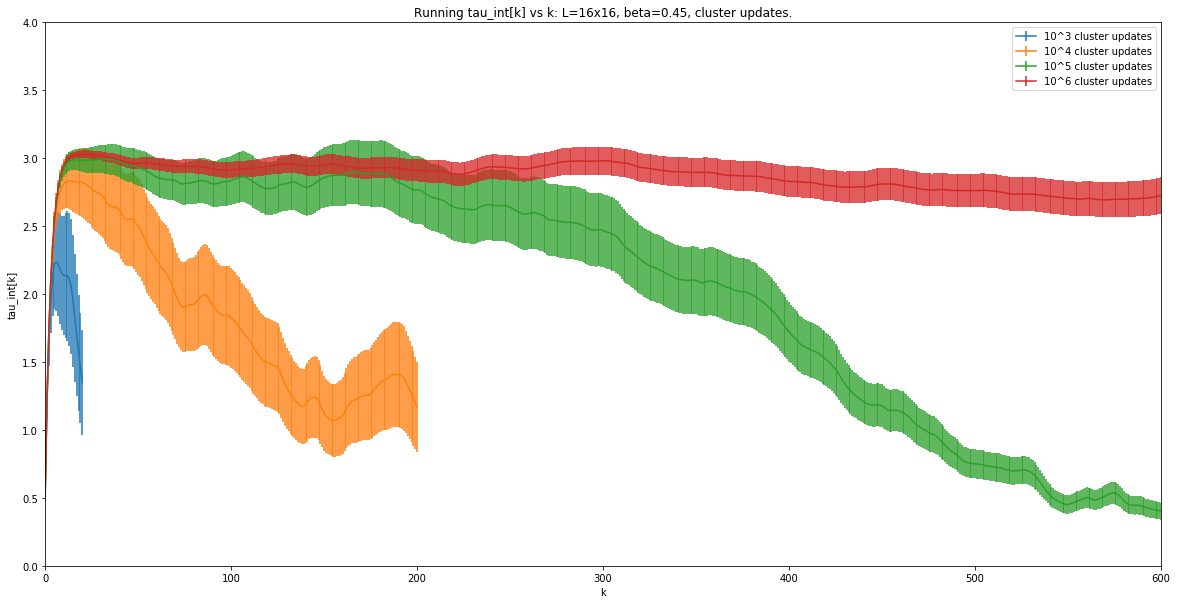

In [8]:
# The running tau_int[k] should approach the true tau_int value as k-> infinity,
# but will also be overwhelmed by statistical noise that grows with increasing k.
# The noise can be reduced by increasing the length of the data series.
# If no plateau is reached, the data series is too short to estimate tau_int reliably.

def plot_tau_run(my_plot, n_updates):
    str_lbl = "10^" + str(n_updates) + " cluster updates"
    tau_run = np.loadtxt("code/results/tau_run" + str(n_updates) + ".txt")
    my_plot.errorbar(tau_run[:,0], tau_run[:,1], yerr=tau_run[:,2], label=str_lbl)

plt.rcParams["figure.figsize"] = (20,10)
plt.figure()
plt.xlim([0,600])
plt.ylim([0,4])
for n_updates in [3, 4, 5, 6]:
    plot_tau_run(plt, n_updates)
plt.ylabel('tau_int[k]')
plt.xlabel('k')
plt.legend()
plt.title('Running tau_int[k] vs k: L=16x16, beta=0.45, cluster updates.')
plt.show()

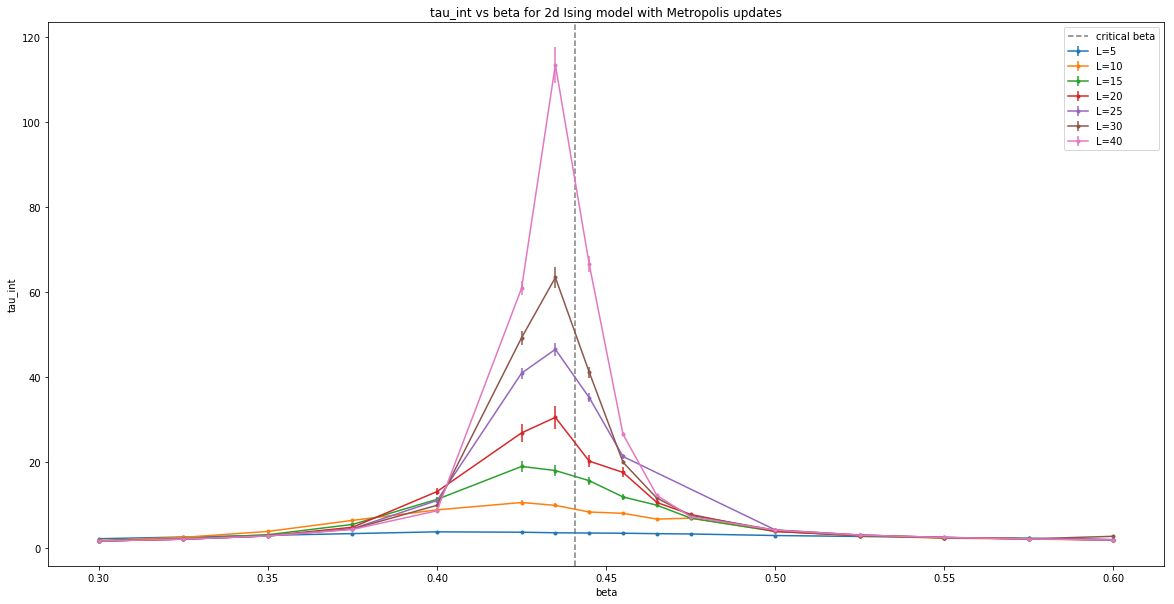

In [3]:
# At critical beta on an infinite lattice, the correlation length in lattice units diverges
# On a finite lattice the correlation length is limited by the lattice size L, and we define
# the pseudo-critical point for a given L as the value of beta for which the correlation length is maximal

# Metropolis updates
plt.figure()
Lvalues_metropolis = [5, 10, 15, 20, 25, 30, 40]
plot_tau_beta(plt, 'm', Lvalues_metropolis)
plt.ylabel('tau_int')
plt.title('tau_int vs beta for 2d Ising model with Metropolis updates')
plt.show()

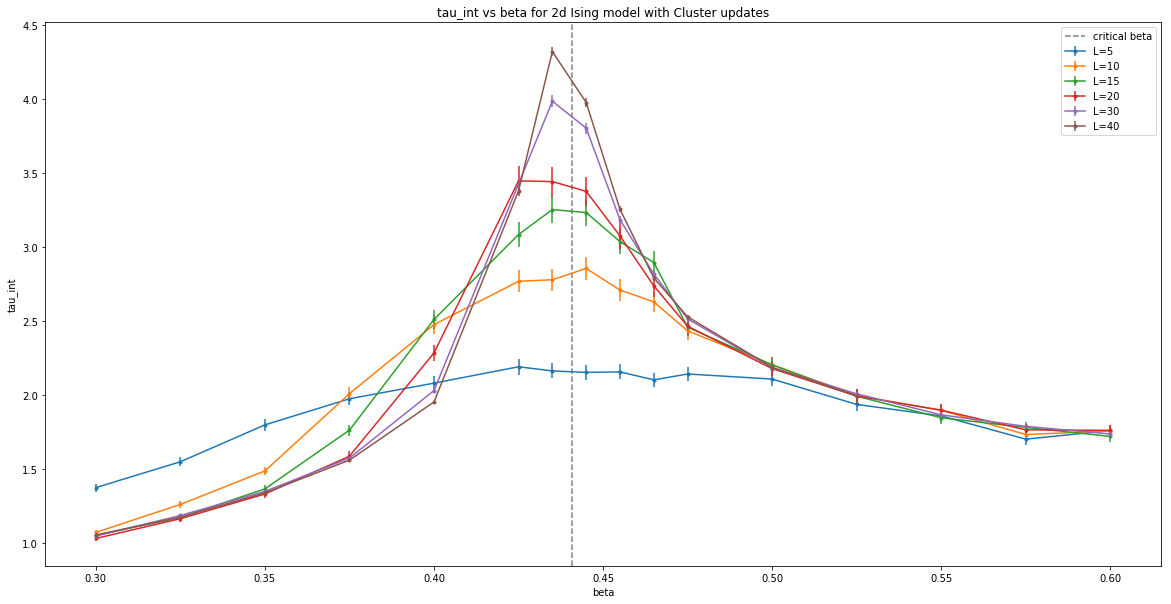

In [4]:
# Cluster updates
plt.figure()
Lvalues_cluster = [5, 10, 15, 20, 30, 40]
plot_tau_beta(plt, 'c', Lvalues_cluster)
plt.ylabel('tau_int')
plt.title('tau_int vs beta for 2d Ising model with Cluster updates')
plt.show()

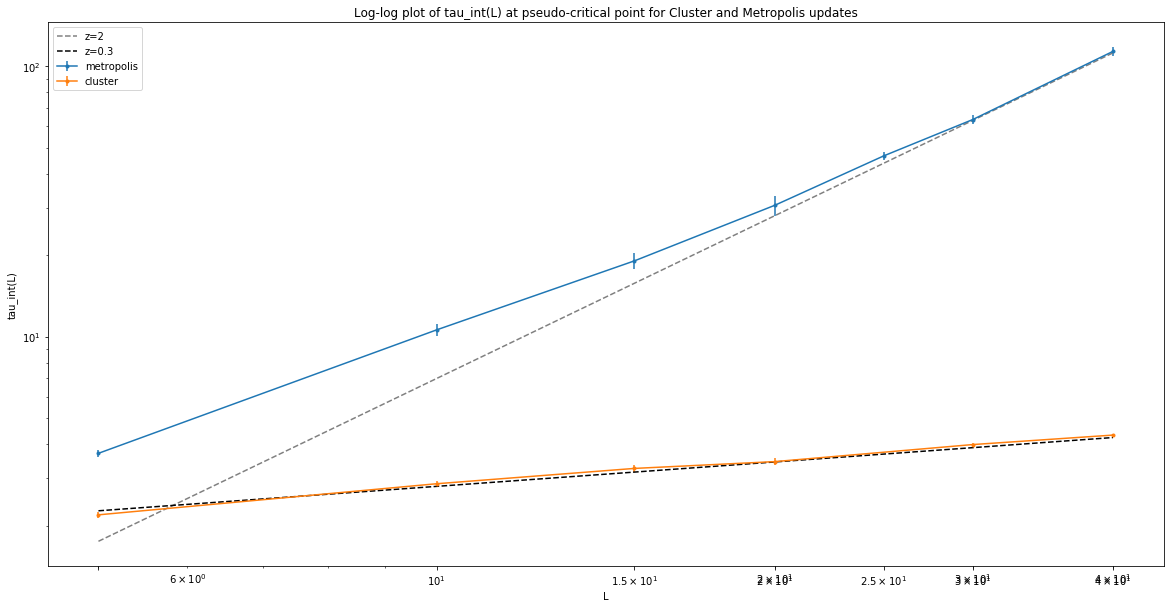

In [11]:
# take largest tau_int(beta, L) as tau_int(beta_pseudo-critical, L)
# log-log plot of pseudo-critical tau_int(L) vs L
# Ansatz: tau_int ~ L^z at pseudo-critical point
# So slope gives scaling exponent z: ~2 for metropolis, ~0.3 for cluster

def extract_tau_pseudocritical(str_update_type, Lvalues):
    ret = []
    for L in Lvalues:
        str_lbl = "L=" + str(L)
        dat = np.loadtxt("code/results/" + str_update_type + "L" + str(L) + ".txt")
        max_index = np.argmax(dat,axis=0)[9]
        ret.append([L,dat[max_index][9],dat[max_index][10]])
    return np.array(ret)

tau_metropolis = extract_tau_pseudocritical('m', Lvalues_metropolis)
tau_cluster = extract_tau_pseudocritical('c', Lvalues_cluster)
plt.figure()
plt.title("Log-log plot of tau_int(L) at pseudo-critical point for Cluster and Metropolis updates")
plt.xscale("log")
plt.xticks(Lvalues_metropolis)
plt.xlabel("L")
plt.yscale("log")
plt.ylabel("tau_int(L)")
plt.errorbar(tau_metropolis[:,0], tau_metropolis[:,1], yerr=tau_metropolis[:,2], marker='.', label='metropolis')
plt.plot(tau_metropolis[:,0], 0.07*np.power(tau_metropolis[:,0], 2), linestyle='--', color='grey', label='z=2')
plt.errorbar(tau_cluster[:,0], tau_cluster[:,1], yerr=tau_cluster[:,2], marker='.', label='cluster')
plt.plot(tau_cluster[:,0], 1.4*np.power(tau_cluster[:,0], 0.3), linestyle='--', color='black', label='z=0.3')
plt.legend()
plt.show()


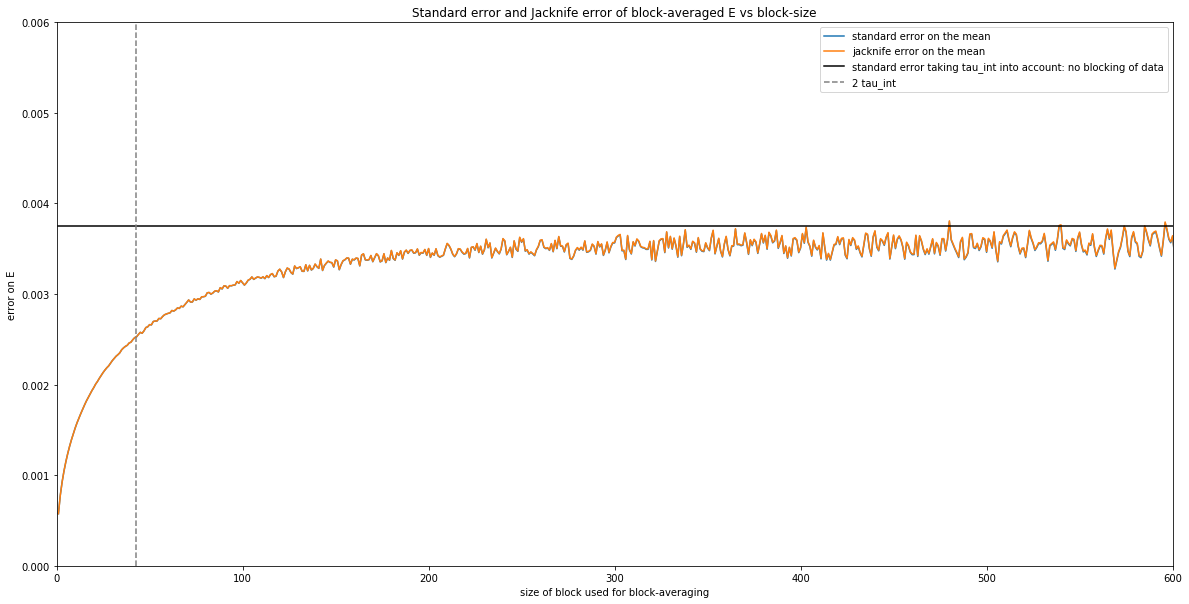

In [6]:
# One way to deal with autocorrelations is to block-average the data set
# From N points, make M blocks of size b, and calculate the average within each block
# For b >> tau_int, we can treat these M block-averaged values as independent data points,
# and use the naive standard error or other error estimates such as jacknife or bootstrap,
# without worrying about autocorrelations

jack = np.loadtxt("code/results/jacknife.txt")
plt.figure()
plt.title("Standard error and Jacknife error of block-averaged E vs block-size")
plt.plot(jack[:,0], jack[:,1], label='standard error on the mean')
plt.plot(jack[:,0], jack[:,2], label='jacknife error on the mean')
plt.plot(jack[:,0], 0*jack[:,0]+0.0037528504244, label='standard error taking tau_int into account: no blocking of data', color="black")
plt.axvline(x=2*21.3, label="2 tau_int", linestyle='--', color="grey")
plt.xlim([0,600])
plt.ylim([0,0.006])
plt.xlabel("size of block used for block-averaging")
plt.ylabel("error on E")
plt.legend()
plt.show()